In [1]:
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

In [2]:
ts = pd.read_csv('TWOSIDES-short.csv', sep=',')
ts

,Drug1,Drug2,PSE
0,Temazepam,sildenafil,Arthralgia
1,Bumetanide,Oxytocin,Arthralgia
2,POLYETHYLENE GLYCOL 3350,Hydroxychloroquine,Arthralgia
3,Tamoxifen,Prednisone,Diarrhoea
4,Temazepam,sildenafil,Diarrhoea
...,...,...,...
42920386,Ketoprofen,montelukast,Activities of daily living impaired
42920387,Ketoprofen,montelukast,Impaired work ability
42920388,Ketoprofen,montelukast,Off label use
42920389,Ketoprofen,montelukast,Hypertension


In [39]:
tmp1 = ts['Drug1'].unique().tolist() 
tmp2 = ts['Drug2'].unique().tolist()


In [45]:
for drug in tmp2:
    if drug in tmp1:
        pass
    else:
        tmp1.append(drug)
ts_drugs = tmp1
len(ts_drugs)

1918

In [41]:
drugs = pd.read_csv('drug_names.tsv', sep='\t')
drug_names = drugs['name'].tolist()
len(drug_names)

1430

In [54]:
ts_drugs_lower = []
for drug in ts_drugs:
    ts_drugs_lower.append(drug.lower())

drug_names_lower = []
for drug in drug_names:
    drug_names_lower.append(drug.lower())

In [59]:
train_drugs = []
valid_drugs = []
for index, drug in enumerate(ts_drugs_lower):
    if drug in drug_names_lower:
        train_drugs.append(ts_drugs[index])
    else:
        valid_drugs.append(ts_drugs[index])
print(len(train_drugs),len(valid_drugs))
        

953 965


In [61]:
valid_drugs

['POLYETHYLENE GLYCOL 3350',
 'drug_1_concept_name',
 'lornoxicam',
 'Urea',
 'Folic Acid',
 'Petrolatum',
 'Regular Insulin, Human',
 'fingolimod',
 'Etanercept',
 'Escitalopram',
 'Polymyxin B',
 'brotizolam',
 'Benserazide',
 'alteplase',
 'Diosmin',
 'coenzyme Q10',
 'Enalapril',
 'Heparinoids',
 'Sodium Bicarbonate',
 'Pyridoxal',
 'Vitamin B Complex',
 'Vitamin D',
 'Selegiline',
 'Lysine',
 'Clavulanate',
 'certolizumab pegol',
 'fluindione',
 'Povidone-Iodine',
 'bevacizumab',
 'buflomedil',
 'calcium acetate',
 'Immunoglobulin G',
 'geranylgeranylacetone',
 'Magnesium Chloride',
 'Cyclosporine',
 'levothyroxine',
 'Factor VIIa',
 'Trimetazidine',
 'Daunorubicin',
 'propiomazine',
 'alemtuzumab',
 'bamifylline',
 'Epirubicin',
 'Pseudoephedrine',
 'Albuterol',
 'potassium citrate',
 'dalfampridine',
 'Isosorbide Dinitrate',
 'Acetylcysteine',
 'tocilizumab',
 'Vitamin A',
 'tinzaparin',
 'Calcium Carbonate',
 'Mycophenolic Acid',
 'darbepoetin alfa',
 'Teriparatide',
 'Magnesiu

In [63]:
%%time

train_list = []
test_list = []
valid_list = []
for i in range(len(ts)):
    
    row =  {'Drug1': ts['Drug1'][i],
            'Drug2': ts['Drug2'][i],
            'PSE': ts['PSE'][i]} 
    
    if ts['Drug1'][i] in train_drugs and ts['Drug2'][i] in train_drugs:
        train_list.append(row)       
    elif ts['Drug1'][i] in valid_drugs and ts['Drug2'][i] in valid_drugs:
        valid_list.append(row)
    else:
        test_list.append(row)
        
ts_train = pd.DataFrame.from_dict(train_list)
ts_test = pd.DataFrame.from_dict(test_list)
ts_valid = pd.DataFrame.from_dict(valid_list)

Wall time: 35min 42s


In [65]:
print(len(ts_train)/len(ts),len(ts_test)/len(ts),len(ts_valid)/len(ts))

0.6067678647195921 0.34088797094136447 0.05234416433904342


In [66]:
ts_train.to_csv('TWOSIDE-train.csv', index=False, sep = ',')
ts_test.to_csv('TWOSIDE-test.csv', index=False, sep = ',')
ts_valid.to_csv('TWOSIDE-valid.csv', index=False, sep = ',')

In [69]:
len(ts_train['PSE'].unique())

12236

In [2]:
ts_train = pd.read_csv('TWOSIDE-train.csv', sep=',')
decagon = pd.read_csv('bio-decagon-combo.csv', sep=',')
decagon

FileNotFoundError: [Errno 2] No such file or directory: 'TWOSIDE-train.csv'

In [72]:
decagon_PSE = decagon['Side Effect Name'].unique().tolist()
print(len(decagon_PSE))

1317


In [81]:
%%time
'''
for i in range(len(ts_train)):
    if ts_train['PSE'][i] in decagon_PSE:
        pass
    else: 
        ts_train.drop(i)
        '''
len(ts_train)
        

Wall time: 0 ns


26042714

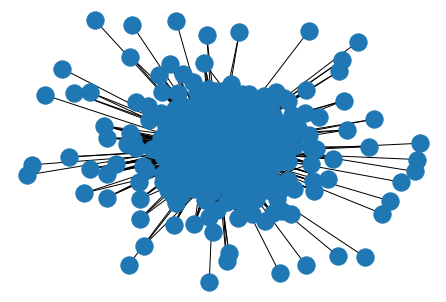

In [83]:
Graphtype = nx.Graph()
G = nx.convert_matrix.from_pandas_edgelist(ts_train, source='Drug1', target='Drug2')
nx.draw(G)

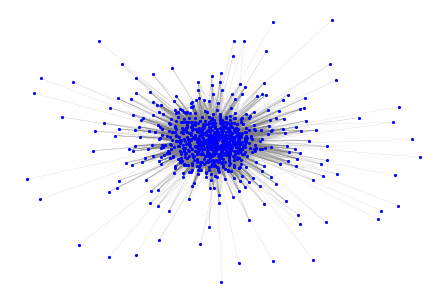

In [98]:
pos = nx.spring_layout(G, seed=1080)
options = {
    "node_color": "blue",
    "node_size": 10,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(G, pos, **options)


In [ ]:
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()